## Recurrent Neural network

Here we will use a covid 19 confirmed new infection data set. 

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


In [24]:
#load the dataset
df = pd.read_csv('Covid_19_train.csv', sep = ",", header=None )
df.columns = ["date", "new_infections"]
df.head()

,date,new_infections
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [25]:
#preprocess the data
data = df['new_infections'].values
data = data.reshape(-1,1)
print(data)

[[0.00000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [2.00000e+00]
 [2.00000e+00]
 [2.00000e+00]
 [2.00000e+00]
 [2.00000e+00]
 [2.00000e+00]
 [2.00000e+00]
 [3.00000e+00]
 [3.00000e+00]
 [3.00000e+00]
 [3.00000e+00]
 [3.00000e+00]
 [3.00000e+00]
 [3.00000e+00]
 [3.00000e+00]
 [3.00000e+00]
 [3.00000e+00]
 [3.00000e+00]
 [3.00000e+00]
 [3.00000e+00]
 [3.00000e+00]
 [2.00000e+01]
 [6.20000e+01]
 [1.55000e+02]
 [2.29000e+02]
 [3.22000e+02]
 [4.53000e+02]
 [6.55000e+02]
 [8.88000e+02]
 [1.12800e+03]
 [1.69400e+03]
 [2.03600e+03]
 [2.50200e+03]
 [3.08900e+03]
 [3.85800e+03]
 [4.63600e+03]
 [5.88300e+03]
 [7.37500e+03]
 [9.17200e+03]
 [1.01490e+04]
 [1.24620e+04]
 [1.24620e+04]
 [1.76600e+04]
 [2.11570e+04]
 [2.47470e+04]
 [2.79800e+04]
 [3.15060e+04]
 [3.57130e+04]
 [4.10350e+04]
 [4.70210e+04]
 [5.35780e+04]
 [5.91380e+04]
 [6.39270e+04]
 [6.91760e+04]
 [7.43860e+04]
 [8.05890e+04]
 [8.64980e+04]
 [9.24720e

In [26]:
# scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [27]:
# split the data into train and test
## np.ceil() will round the result to the nearest whole number
train_data_len = int(np.ceil(len(scaled_data)* .95))
train_data = scaled_data[0:int(train_data_len),:]
#take the last 7 datapoints in the train data and continue testing till the end of the dataset
test_data = scaled_data[int(train_data_len)-7:,:]

## Splitting Data into Sequences
Create a function create_sequences() to split the scaled data into sequences of 7 days each, where the target of each sequence is the number of new cases on the 8th day.

In [30]:
# create sequences
def create_sequences(data):
    X, y = [],[]
    for i in range(7, len(data)):
        X.append(data[i-7:i,0])
        y.append(data[i,0])
    return np.array(X), np.array(y)
    
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# reshape the input into the shape required by LSTM layers
## This reshaping is necessary to match the expected input shape of the LSTM layers, where the input shape is (batch_size, sequence_length, num_features)
X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test= np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

print(y_train.shape)

(67,)


In [34]:
# create the LSTM
model= Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2024-01-09 13:26:40.617497: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3/3 [==============================] - 1s 5ms/step - loss: 0.1131
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0753
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0362
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0176
Epoch 7/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 9/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 10/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 11/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 12/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 13/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 

In [35]:
# Predicting on test data
predicted_values = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values)

1/1 [==============================] - 0s 317ms/step


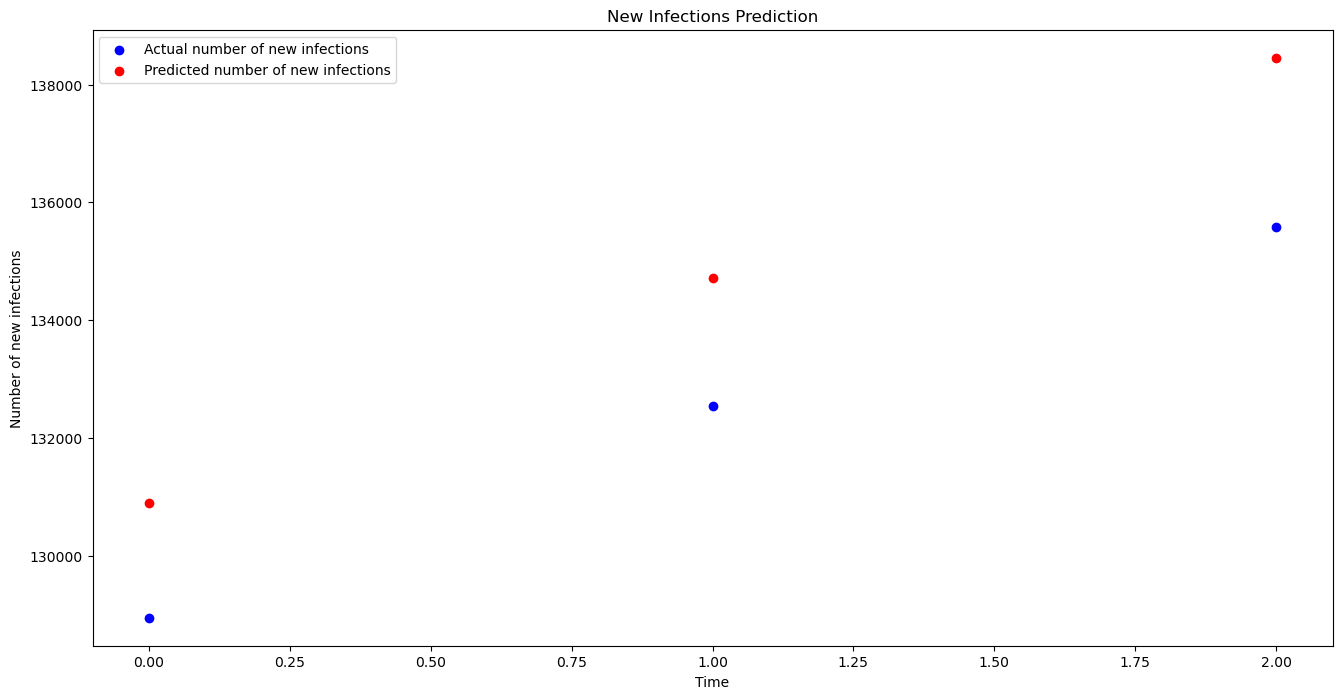

In [36]:
# Getting the real values
real_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(16,8))
plt.scatter(range(len(real_values)), real_values, color='blue', label='Actual number of new infections')
plt.scatter(range(len(predicted_values)), predicted_values, color='red', label='Predicted number of new infections')
plt.title('New Infections Prediction')
plt.xlabel('Time')
plt.ylabel('Number of new infections')
plt.legend()
plt.show()